In [2]:
import tensorflow as tf
from tensorflow import keras
import random as rnd
import numpy as np
import math
import time
import gym
from IPython.display import clear_output
from tensorflow.keras.optimizers import Adam

2022-08-04 21:20:38.948622: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-04 21:20:38.948643: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/kimiya/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Evironment

In [3]:
env=gym.make("LunarLander-v2")
env.reset()
env.render()
env.close()

/home/kimiya/.local/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/kimiya/.local/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/kimiya/.local/lib/python3.8/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', rend

In [4]:
env = gym.make("LunarLander-v2")

env.reset()
for _ in range(1000):
    observation, reward, done, info = env.step(env.action_space.sample())
    env.render()
    print(observation, reward, done, info)
    if done:
        env.reset()
env.close()

/home/kimiya/.local/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/kimiya/.local/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/kimiya/.local/lib/python3.8/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', rend

[-0.00612926  1.4096985  -0.30999595 -0.03999038  0.00703225  0.0694968
  0.          0.        ] -0.4403969483058745 False {}
[-0.0092844   1.4082099  -0.32131815 -0.06619709  0.01277184  0.11480244
  0.          0.        ] -2.0069694157341744 False {}
[-0.01253519  1.40612    -0.3333053  -0.09298222  0.02091039  0.1627863
  0.          0.        ] -2.4339642943676822 False {}
[-0.01586723  1.4034264  -0.34349844 -0.11988293  0.03108739  0.20355943
  0.          0.        ] -2.560274409002544 False {}
[-0.0192688   1.4001334  -0.3522032  -0.1466507   0.04300189  0.23831198
  0.          0.        ] -2.666172155524946 False {}
[-0.02258396  1.396236   -0.34134203 -0.17352423  0.05273472  0.19467452
  0.          0.        ] -0.758718425262656 False {}
[-0.02589941  1.3917398  -0.3413694  -0.20019957  0.0624673   0.19466971
  0.          0.        ] -1.8121825701968532 False {}
[-0.02929401  1.3866321  -0.3512933  -0.22754972  0.07419395  0.23455386
  0.          0.        ] -2.9795871

[-0.49921983  0.17229131 -1.258132   -1.5247529   1.8818244   0.4974045
  0.          0.        ] -4.185048219670221 False {}
[-0.5127403   0.1375105  -1.3438898  -1.5620836   1.9072278   0.50806725
  0.          0.        ] -11.495878571612753 False {}
[-0.5262932   0.10222543 -1.3473355  -1.5828899   1.9303157   0.46175998
  0.          0.        ] -4.6706427064232505 False {}
[-0.54026616  0.06616732 -1.3887652  -1.617237    1.9535868   0.46542048
  0.          0.        ] -8.74735992633838 False {}
[-0.55426705  0.02961582 -1.392047   -1.6374793   1.9743631   0.41552567
  0.          0.        ] -4.935282433975003 False {}
[-0.5685278  -0.00798857 -1.4179733  -1.683658    1.9943271   0.3992784
  0.          0.        ] -8.848943867616004 False {}
[-0.5827919  -0.04619521 -1.4179271  -1.7103112   2.0142903   0.3992674
  0.          0.        ] -5.642249202970788 False {}
[-0.5970993  -0.08487778 -1.4232442  -1.7295399   2.0312614   0.33942273
  0.          0.        ] -5.39646611232

[ 0.36140147  0.65850776  0.889923   -1.0032283  -0.5251298  -0.3633546
  0.          0.        ] -3.1242806242416052 False {}
[ 0.37014198  0.635475    0.8899024  -1.029919   -0.5432971  -0.36334634
  0.          0.        ] -2.2488532861932526 False {}
[ 0.37895823  0.6117808   0.89931667 -1.0603447  -0.5638109  -0.41027516
  0.          0.        ] -3.427808757496648 False {}
[ 0.38769618  0.58756715  0.889048   -1.0827085  -0.58171594 -0.35810056
  0.          0.        ] -1.3102125057114609 False {}
[ 0.39653406  0.5633759   0.8994169  -1.0821468  -0.6002888  -0.37145752
  0.          0.        ] -1.273043623195224 False {}
[ 0.40531912  0.5386383   0.8924948  -1.1059345  -0.6171022  -0.33626747
  0.          0.        ] -1.6298900835029986 False {}
[ 0.4141799   0.51324016  0.90181416 -1.1363858  -0.6362632  -0.3832198
  0.          0.        ] -3.447190458044331 False {}
[ 0.4229743   0.4873162   0.89310133 -1.1590016  -0.65311    -0.3369369
  0.          0.        ] -1.53581592

[ 0.23856726  1.3543355   0.8701552  -0.2476462  -0.24508068 -0.23842105
  0.          0.        ] -3.733934283694384 False {}
[ 0.24715185  1.3482082   0.8701509  -0.27432454 -0.25700164 -0.23841894
  0.          0.        ] -1.5068176067047148 False {}
[ 0.25573665  1.3414824   0.8701464  -0.30100283 -0.26892248 -0.23841675
  0.          0.        ] -1.525622045169257 False {}
[ 0.26441735  1.33413     0.88212    -0.32941583 -0.2833297  -0.28814372
  0.          0.        ] -3.0030351736419036 False {}
[ 0.27315807  1.3261588   0.88958085 -0.35737178 -0.29930687 -0.31954363
  0.          0.        ] -2.725461739461734 False {}
[ 0.28196478  1.3175496   0.8978675  -0.3862678  -0.31711757 -0.35621402
  0.          0.        ] -3.0244051714443843 False {}
[ 0.2908992   1.3090997   0.91069174 -0.37942666 -0.3350971  -0.35959086
  0.          0.        ] -2.376971642864919 False {}
[ 0.29991627  1.3000135   0.9209932  -0.40844086 -0.35531536 -0.40436482
  0.          0.        ] -3.457418

[ 0.01440172  1.404074    0.7351007  -0.16489549 -0.01866617 -0.2076483
  0.          0.        ] -2.2334618384078895 False {}
[ 0.02164812  1.399767    0.73513323 -0.19157405 -0.02904134 -0.20752287
  0.          0.        ] -1.2478827599970543 False {}
[ 0.02909536  1.3959284   0.7543295  -0.17082909 -0.03855346 -0.19026017
  0.          0.        ] -2.255520569777178 False {}
[ 0.03647394  1.3915043   0.7457129  -0.19685411 -0.04632308 -0.15540642
  0.          0.        ] -0.1647393353250652 False {}
[ 0.0439476   1.3864855   0.7576216  -0.22340228 -0.05647053 -0.20296803
  0.          0.        ] -2.426163659070396 False {}
[ 0.05142183  1.380868    0.7576524  -0.25007844 -0.06661493 -0.20290661
  0.          0.        ] -1.27722643626322 False {}
[ 0.05908108  1.3760382   0.775565   -0.21511917 -0.07617214 -0.19116151
  0.          0.        ] -1.5026817790366238 False {}
[ 0.06673755  1.3721478   0.7756608  -0.17343912 -0.08611368 -0.19884905
  0.          0.        ] 0.06258243

  1.          0.        ] -16.95529532843156 False {}
[ 0.6201355   0.03556817  0.11001627  0.0630302  -1.6417208  -0.4355566
  1.          0.        ] -100 True {}
[1.7982483e-03 1.4149003e+00 8.4053636e-02 7.5841025e-02 1.5455237e-04
 2.4863098e-02 0.0000000e+00 0.0000000e+00] 2.49088509685845 False {}
[2.6513101e-03 1.4160070e+00 8.4049724e-02 4.9191196e-02 1.3967818e-03
 2.4846900e-02 0.0000000e+00 0.0000000e+00] 1.3474779987685679 False {}
[0.00341587 1.416521   0.0729451  0.02283138 0.00486527 0.06937607
 0.         0.        ] 1.6667857970326179 False {}
[ 0.00418024  1.4164348   0.07293441 -0.00383777  0.00833223  0.06934564
  0.          0.        ] 0.0016473089725934642 False {}
[ 0.00502987  1.4157615   0.08362506 -0.02994094  0.00965181  0.02639424
  0.          0.        ] -1.6737182213597623 False {}
[ 0.0058795   1.4144878   0.08362155 -0.05660944  0.01097214  0.026409
  0.          0.        ] -1.2207686281361987 False {}
[ 0.0068243   1.4126091   0.09557432 -0.08349729

[ 0.06103802  0.5729869   0.03860662 -1.2293173   0.06331633  0.29528838
  0.          0.        ] -1.4082392295314878 False {}
[ 0.06157341  0.5447426   0.03860813 -1.2560023   0.07808053  0.29528394
  0.          0.        ] -1.3418964692663735 False {}
[ 0.06220665  0.51591396  0.05092968 -1.2819619   0.09036344  0.24565813
  0.          0.        ] -1.0399910248649167 False {}
[ 0.06288795  0.48798501  0.05510294 -1.2421268   0.10328507  0.2584328
  0.          0.        ] 5.133323433761132 False {}
[ 0.06361818  0.46001744  0.05960336 -1.2439834   0.11661015  0.26650152
  0.          0.        ] 0.923794137004404 False {}
[ 0.06425657  0.43143597  0.04810709 -1.2715899   0.1322629   0.31305486
  0.          0.        ] -1.4841076353302174 False {}
[ 0.06480589  0.40224618  0.03697855 -1.2990148   0.15016203  0.35798258
  0.          0.        ] -1.6478913112035503 False {}
[ 0.06526203  0.37245148  0.02538772 -1.3263781   0.17039473  0.4046541
  0.          0.        ] -1.83055513

[-0.21527037  0.87839556 -0.4232339  -0.9246052   0.20560518  0.13903661
  0.          0.        ] -1.8277734847166005 False {}
[-0.21936794  0.8570439  -0.41490316 -0.94968694  0.21080126  0.10392165
  0.          0.        ] -0.5275083883448122 False {}
[-0.22338767  0.83512545 -0.40507954 -0.9745959   0.21393438  0.06266242
  0.          0.        ] -0.2309725397680029 False {}
[-0.2277122   0.8139793  -0.4350795  -0.94021505  0.21658756  0.05306334
  0.          0.        ] 3.302826970912503 False {}
[-0.23203678  0.7922333  -0.43507928 -0.96688217  0.21924073  0.05306331
  0.          0.        ] -0.7197710799133574 False {}
[-0.23644881  0.76984936 -0.44612265 -0.99557835  0.22421949  0.09957525
  0.          0.        ] -1.5807967663744467 False {}
[-0.24098873  0.74768    -0.45888883 -0.9860558   0.22917958  0.09920144
  0.          0.        ] 1.5182817234780657 False {}
[-0.24559036  0.72489583 -0.46661338 -1.0136492   0.23572557  0.13091941
  0.          0.        ] -1.49423

[-0.07295151  0.93110263 -0.23603149 -0.90679085  0.0806042   0.02573344
  0.          0.        ] -0.6905103564691046 False {}
[-0.07537212  0.91009915 -0.24521954 -0.93365735  0.083731    0.06253579
  0.          0.        ] -1.1002471075927065 False {}
[-0.07776575  0.88970405 -0.24295728 -0.90665376  0.08729367  0.07125355
  0.          0.        ] 4.02367946888283 False {}
[-0.08015938  0.86870915 -0.24295714 -0.9333214   0.09085635  0.07125358
  0.          0.        ] -0.8649620025987872 False {}
[-0.08246784  0.84713334 -0.23225793 -0.9590103   0.0922516   0.027905
  0.          0.        ] -0.27420594582107927 False {}
[-0.08471489  0.82497656 -0.2245265  -0.984737    0.0920723  -0.00358586
  0.          0.        ] -0.1572624742355788 False {}
[-0.08696194  0.8022197  -0.22452648 -1.0114036   0.091893   -0.00358581
  0.          0.        ] -0.3441583458504738 False {}
[-0.08920898  0.7788629  -0.22452648 -1.0380702   0.0917137  -0.00358581
  0.          0.        ] -0.290508

[ 0.29226655  0.81475985  0.75437677 -1.0119593  -0.17220467  0.05688458
  0.          0.        ] 0.7527046159167139 False {}
[ 0.299905    0.79135436  0.76275337 -1.0401133  -0.17110957  0.02190184
  0.          0.        ] -0.7506080123991683 False {}
[ 0.30747128  0.76736814  0.753679   -1.0657188  -0.16815549  0.05908173
  0.          0.        ] 0.6780313693866173 False {}
[ 0.31496677  0.7427895   0.7448193  -1.0918581  -0.163419    0.09473009
  0.          0.        ] 0.7888584889024923 False {}
[ 0.3225545   0.7175872   0.75639355 -1.1198434  -0.16105051  0.0473695
  0.          0.        ] -0.7526266471754457 False {}
[ 3.3023462e-01  6.9175887e-01  7.6803476e-01 -1.1479319e+00
 -1.6106930e-01 -3.7592632e-04  0.0000000e+00  0.0000000e+00] -0.991719597124727 False {}
[ 0.3381098   0.6664939   0.7872222  -1.1228583  -0.16077344  0.00591688
  0.          0.        ] 2.63307425415253 False {}
[ 0.34604082  0.64201087  0.79323876 -1.0881459  -0.16090445 -0.00262062
  0.          0

[-0.05243216  0.7517601  -0.10400243 -0.9595408   0.07534431  0.13291363
  0.          0.        ] -1.1689895950682399 False {}
[-0.05331154  0.72959405 -0.09225764 -0.9853815   0.07962102  0.08553418
  0.          0.        ] -0.7059858305378544 False {}
[-0.0541069   0.7068303  -0.08171656 -1.0118436   0.0817873   0.04332564
  0.          0.        ] -0.5272234884947398 False {}
[-0.05490217  0.6834665  -0.08171651 -1.0385106   0.08395358  0.04332562
  0.          0.        ] -0.5518839072809669 False {}
[-0.05569754  0.6595027  -0.08171646 -1.0651777   0.08611988  0.0433259
  0.          0.        ] -0.4935649897775818 False {}
[-0.0564929   0.63493913 -0.08171641 -1.0918447   0.08828618  0.04332591
  0.          0.        ] -0.4353974710844284 False {}
[-0.05735951  0.60975534 -0.09068912 -1.1195251   0.09227625  0.07980151
  0.          0.        ] -0.7583878231294807 False {}
[-0.05828219  0.5850198  -0.09633826 -1.0996104   0.09630561  0.08058716
  0.          0.        ] 3.6871

[-0.23137823  1.167643   -0.6141412  -0.548192    0.42957127  0.2364749
  0.          0.        ] -1.8454408633954245 False {}
[-0.2373515   1.154826   -0.6065899  -0.57250285  0.43964896  0.2015535
  0.          0.        ] -0.9873036011108798 False {}
[-0.24356885  1.1423906  -0.6311971  -0.55568504  0.44999284  0.20687696
  0.          0.        ] -0.9302827467072519 False {}
[-0.24972114  1.1294066  -0.62285614 -0.57954574  0.45837104  0.1675639
  0.          0.        ] -0.7124010276674244 False {}
[-0.25587374  1.1158234  -0.62285227 -0.60621756  0.4667492   0.16756311
  0.          0.        ] -1.4863894421182238 False {}
[-0.26194435  1.101713   -0.612322   -0.6289079   0.47256756  0.1163679
  0.          0.        ] -0.23553212943215726 False {}
[-0.26809254  1.086939   -0.62219435 -0.65916497  0.4807638   0.16392472
  0.          0.        ] -2.42589453340119 False {}
[-0.27431393  1.0715094  -0.6314613  -0.6890347   0.49116486  0.20802145
  0.          0.        ] -2.5436966

[ 0.0714016   1.0962344   0.25694746 -0.7004321  -0.05681369  0.03871771
  0.          0.        ] -0.3467642848628134 False {}
[ 0.07399063  1.0798731   0.25694743 -0.72709906 -0.05487781  0.03871763
  0.          0.        ] -0.7001983822876525 False {}
[ 0.07657976  1.0629117   0.2569474  -0.753766   -0.05294194  0.03871758
  0.          0.        ] -0.6518804659457658 False {}
[ 0.07928562  1.0459003   0.26817268 -0.7559798  -0.05055604  0.0477181
  0.          0.        ] 1.0373156269827006 False {}
[ 0.08206539  1.0282881   0.27744102 -0.78275144 -0.05002586  0.01060351
  0.          0.        ] -1.0756165675138039 False {}
[ 0.08490677  1.0100719   0.28516966 -0.80964285 -0.05104575 -0.02039803
  0.          0.        ] -1.1326440779716325 False {}
[ 0.08778801  0.9924075   0.28915066 -0.78511876 -0.05206243 -0.0203333
  0.          0.        ] 3.5058841744768587 False {}
[ 0.09066925  0.97414297  0.28915066 -0.8117856  -0.0530791  -0.02033333
  0.          0.        ] -0.816036

  0.          0.        ] 0.05265671788694817 False {}
[-0.04293184  1.4854369  -0.21681099 -0.05640061  0.1819356   0.22987492
  0.          0.        ] -2.6708667603153047 False {}
[-0.04510889  1.4848378  -0.2292536  -0.02808913  0.19355752  0.23245907
  0.          0.        ] -2.102857616317368 False {}
[-0.04731798  1.4842768  -0.23266777 -0.02650976  0.20541331  0.23713681
  0.          0.        ] -1.7569054846032544 False {}
[-0.04943237  1.4831374  -0.22075245 -0.05196548  0.21483035  0.18835737
  0.          0.        ] -0.12603660790207868 False {}
[-0.0514658   1.481399   -0.2106616  -0.07834297  0.22222908  0.14797476
  0.          0.        ] -0.40016685878973024 False {}
[-0.05349932  1.4790615  -0.2106601  -0.10501411  0.22962779  0.14797416
  0.          0.        ] -1.5761167554281315 False {}
[-0.05559797  1.4761002  -0.21885498 -0.13304314  0.23874167  0.1822775
  0.          0.        ] -2.726900898205598 False {}
[-0.05769672  1.4725399  -0.21885256 -0.15971659  

[-0.38869065  0.32061338 -1.0346911  -1.4011406   1.2710611   0.34606186
  0.          0.        ] -4.36646527677708 False {}
[-0.39902014  0.28860843 -1.0388656  -1.4356197   1.2914268   0.40731534
  0.          0.        ] -3.9560922871084743 False {}
[-0.40932512  0.25610635 -1.0353796  -1.4562324   1.3094028   0.35951993
  0.          0.        ] -2.3381950643969547 False {}
[-0.41961092  0.22312196 -1.0324829  -1.4759763   1.3247039   0.3060228
  0.          0.        ] -2.2467284537686667 False {}
[-0.42991096  0.189442   -1.0341856  -1.5083592   1.3421799   0.3495201
  0.          0.        ] -3.992329523005792 False {}
[-0.44021374  0.15516295 -1.0341482  -1.5350318   1.3596555   0.34951267
  0.          0.        ] -3.6473700093665116 False {}


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import LeakyReLU

In [15]:
class DQN:
    def __init__(self,states):
        self._build_model(states)
        pass

    def _build_model(self,states):
        self.model= Sequential()
        self.model.add(Dense(24,input_shape=(states,),activation='relu'))
        self.model.add(Dense(24,activation='relu'))
        #self.model.add(Dense(24,activation='relu'))
        self.model.add(Dense(4))
        self.model.add(LeakyReLU(alpha=0.05))
        #self.model.summary()

        self.model.compile(optimizer=Adam(learning_rate=0.001),loss='mse')

    def predict(self, state):
        #print(state)
        return self.model.predict(state)

    def learn(self,state,target):
        loss=self.model.fit(state,target,verbose=0,epochs=1)
        #loss=self.model.fit(state,target,epochs=1)
        #print("loss=",loss)


    def set_weights(self,dqn_target):
        self.model.set_weights(dqn_target.model.get_weights())

    

In [16]:
class Replay_memory:
    def __init__(self,max_size,action_dim,input_dim):
        self.states=np.zeros((max_size,input_dim))
        self.actions=np.zeros(max_size)
        self.rewards=np.zeros(max_size)
        self.next_states=np.zeros((max_size,input_dim))
        self.max_size=max_size
        self.curr_size=0
        self.index=0

    def store(self,state,action,reward,next_state):
        self.states[self.index]=state
        self.actions[self.index]=action
        self.rewards[self.index]=reward
        self.next_states[self.index]=next_state
        
        self.index=(self.index+1)%self.max_size
        self.curr_size= self.curr_size if self.curr_size>=self.max_size else self.curr_size+1
    
    def sample(self,batch_size):
        batch = np.random.choice(min(self.max_size,self.curr_size), batch_size)

        states = self.states[batch]
        actions = self.actions[batch]
        rewards = self.rewards[batch]
        next_states = self.next_states[batch]
        
        return states,actions,rewards,next_states

        

## Algorithm1

In [17]:
def choose_by_epsilon_greedy(env,state,epsilon,Q_fun):
    MAX_CHOICE=1
    RANDOM_CHOICE=0
    mode=rnd.choices([RANDOM_CHOICE,MAX_CHOICE], cum_weights=(epsilon,1), k=1)[0]
    #print(mode)
    if mode==RANDOM_CHOICE:
        return env.action_space.sample()
    else:
        q_out=Q_fun.predict(np.array([state]))
        #print(q_out)
        arg_max=np.argmax(q_out)
        return arg_max
        


In [18]:
env = gym.make("LunarLander-v2")

EPISODES=400
STEPS=300
STEPS_PER_UPDATE=30
BATCH_SIZE=16
SPACE_SIZE=8
ACTION_SIZE=4

REPLAY_MEMORY_SIZE=2000

DISCOUNT_FACTOR=0.99

EPSILON=1

total_steps=0

Q_target=DQN(SPACE_SIZE)
Q_evaluate=DQN(SPACE_SIZE)

action_space = [i for i in range(ACTION_SIZE)]

replay_memory=Replay_memory(REPLAY_MEMORY_SIZE,ACTION_SIZE,SPACE_SIZE)
rewards=[]
for e in range(EPISODES):
    state=env.reset()
    episode_rew=0
    for s in range(STEPS):
        
        action = choose_by_epsilon_greedy(env,state,EPSILON,Q_evaluate)
        
        if EPSILON > 0.1:
            EPSILON*=0.996

        next_state,reward,done,_=env.step(action)

        replay_memory.store(state,action,reward,next_state)

        state_sample,action_sample,reward_sample,next_state_sample=replay_memory.sample(BATCH_SIZE)

        q_values_next = Q_target.predict(next_state_sample)
        q_values_current =Q_evaluate.predict(state_sample)
        
        batch_index = np.arange(BATCH_SIZE, dtype=np.int32)
        max_actions = np.argmax(q_values_next, axis=1)
        q_values_current[batch_index, action_sample.astype(int)] = reward_sample + \
                    np.invert(s==STEPS-1).astype(np.float32) * DISCOUNT_FACTOR *q_values_next[batch_index, max_actions.astype(int)]
        
        Q_evaluate.learn(state_sample, q_values_current)
        state = next_state
        total_steps += 1
        episode_rew+=reward
        if total_steps % STEPS_PER_UPDATE == 0:
            print("updating weights")
            Q_target.set_weights(Q_evaluate)
        if e > 300:
            env.render()
        #env.render()
        if done:
            print("done")
            break
    print(episode_rew,e,EPSILON)
    rewards.append(episode_rew)

Q_target.model.save('targetmodel2')
Q_evaluate.model.save('evaluatemodel2')
clear_output()

## Algorithm2

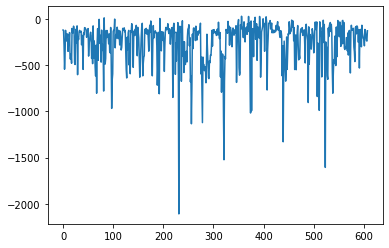

In [23]:
from matplotlib import pyplot as plt
plt.plot(rewards)
env.close()

In [24]:
n=20
rewards_per_n_episodes = np.split(np.array(rewards),len(rewards)/n)
average_reward_per_n_episodes=[]
for reward_set in rewards_per_n_episodes:
    average_reward_per_n_episodes.append(np.average(reward_set));
    
plt.plot(average_reward_per_n_episodes)

ValueError: array split does not result in an equal division

In [21]:
Q_target.model.save('targetmodel')
Q_evaluate.model.save('evaluatemodel')

INFO:tensorflow:Assets written to: targetmodel/assets
INFO:tensorflow:Assets written to: evaluatemodel/assets


In [22]:
EPISODES=500
STEPS=1000
STEPS_PER_UPDATE=30
BATCH_SIZE=16
SPACE_SIZE=8
ACTION_SIZE=4

REPLAY_MEMORY_SIZE=20

DISCOUNT_FACTOR=0.99

#EPSILON=1

#total_steps=0

#Q_target=DQN(SPACE_SIZE)
#Q_evaluate=DQN(SPACE_SIZE)

action_space = [i for i in range(ACTION_SIZE)]

#replay_memory=Replay_memory(REPLAY_MEMORY_SIZE,ACTION_SIZE,SPACE_SIZE)
#rewards=[]
for e in range(EPISODES):
    state=env.reset()
    episode_rew=0
    for s in range(STEPS):
        
        action = choose_by_epsilon_greedy(env,state,EPSILON,Q_evaluate)
        
        if EPSILON > 0.1:
            EPSILON-=0.01

        next_state,reward,done,_=env.step(action)

        replay_memory.store(state,action,reward,next_state)

        state_sample,action_sample,reward_sample,next_state_sample=replay_memory.sample(BATCH_SIZE)

        q_values_next = Q_target.predict(next_state_sample)
        q_values_current =Q_evaluate.predict(state_sample)
        
        batch_index = np.arange(BATCH_SIZE, dtype=np.int32)
        max_actions = np.argmax(q_values_next, axis=1)
        q_values_current[batch_index, action_sample.astype(int)] = reward_sample + \
                    np.invert(s==STEPS-1).astype(np.float32) * DISCOUNT_FACTOR *q_values_next[batch_index, max_actions.astype(int)]
        
        Q_evaluate.learn(state_sample, q_values_current)
        state = next_state
        total_steps += 1
        episode_rew+=reward
        if total_steps % STEPS_PER_UPDATE == 0:
            print("updating weights")
            Q_target.set_weights(Q_evaluate)
        #env.render(mode = "human")
        if done:
            print("done")
            break
    print(episode_rew,e)
    rewards.append(episode_rew)


updating weights
updating weights
done
-61.797159109752975 0
updating weights
updating weights
updating weights
done
-58.16238231385555 1
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
done
-349.0074972061143 2
updating weights
updating weights
updating weights
done
-47.88774933318471 3
updating weights
updating weights
updating weights
done
-47.71911119778229 4
updating weights
updating weights
done
23.654101342785495 5
updating weights
updating weights
updating weights
done
-34.3159143064798 6
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
up

updating weights
updating weights
done
-288.3837681289017 69
updating weights
updating weights
done
-442.4804228920086 70
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
done
-383.48348435164496 71
updating weights
updating weights
updating weights
done
-429.2766568838535 72
updating weights
updating weights
updating weights
done
-174.97518054803191 73
updating weights
updating weights
updating weights
updating weights
done
-107.71080444325281 74
updating weights
updating weights
updating weights
done
-139.54512548845497 75
updating weights
updating weights
updating weights
done
-104.21816883467267 76
updating weights
done
-93.54970208358253 77
updating weights
updating weights
updating weights
done
-178.20266679500432 78
updating weights
updating weights
updating weights
done
-128.51260429980533 79
updating weights
updating weights
done
-129.17209465637063 80
updating weights
updating weights
done
-117.483115229241

updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
done
-147.55180510226143 136
updating weights
updating weights
updating weights
done
-557.0683870873943 137
updating weights
updating weights
updating weights
updating weights
updating weights
done
-803.5628095597389 138
updating weights
updating weights
updating weights
updating weights
done
-592.2313370148572 139
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
done
-439.2608263428

updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
done
-67.85810701767451 175
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
upd

updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
done
-212.8142971920051 199
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
updating weights
don

KeyboardInterrupt: 

In [83]:
env.close()